In [ ]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database (creates 'dinosaurs_database.db' if it doesn't exist)
con = duckdb.connect("dinosaurs_database.db")

# List available tables in the database
tables = con.execute("SHOW TABLES").fetchall()
print("Available tables:", tables)

# Read a table into a Pandas DataFrame
dinosaur_table = con.execute("SELECT * FROM dinosaur_table").fetchdf()

# Display first few rows
print(dinosaur_table.head())

Below is the sql version of the query I am performing:

In [ ]:
SELECT 
    formation, 
    COUNT(*) AS specimen_count, 
    ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM specimens), 2) AS percentage
FROM specimens
JOIN localities ON specimens.locno = localities.locno
JOIN formations ON localities.formation = formations.formation
GROUP BY formation
ORDER BY specimen_count DESC;

And here is the python data for the query now that I have imported it into python:

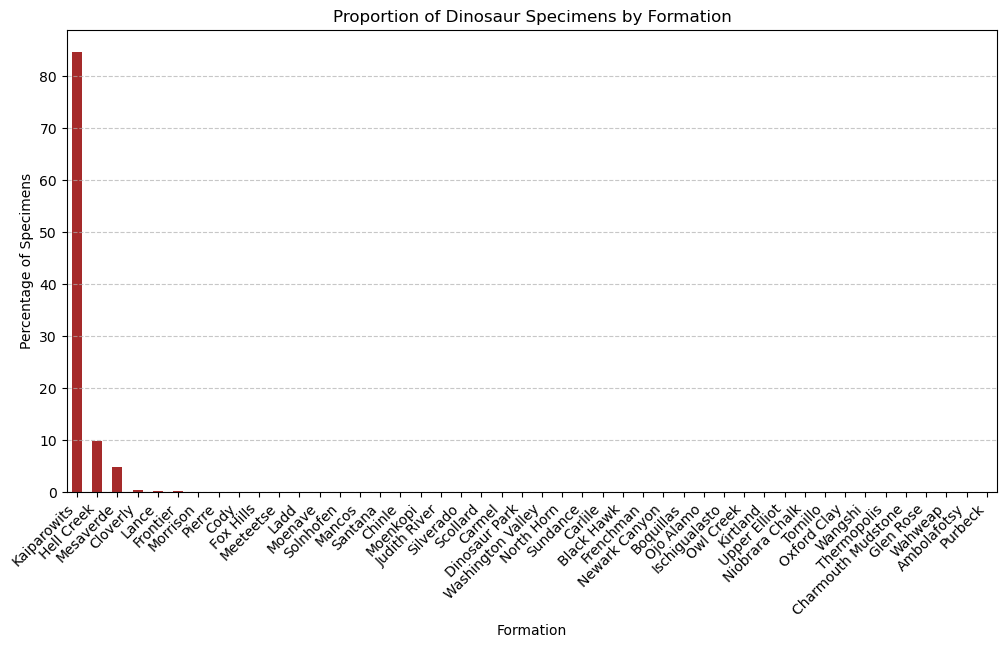

In [ ]:
# Group by formation and calculate proportions
specimen_counts = dinosaur_table['formation'].value_counts(normalize=True) * 100

# Create data vizualization
plt.figure(figsize=(12, 6))
specimen_counts.plot(kind='bar', color='brown')

# Formatting
plt.xlabel("Formation")
plt.ylabel("Percentage of Specimens")
plt.title("Proportion of Dinosaur Specimens by Formation")
plt.xticks(rotation=45, ha="right") 
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()